Open the dataset ames_housing_no_missing.csv with the following command:

In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

ames_housing is a pandas dataframe. The column "SalePrice" contains the target variable.

To simplify this exercise, we will only used the numerical features defined below:

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

<h1>Question 1</h1> (1/1 point)

How large is the largest absolute value of the weight (coefficient) in this trained model?
a) Lower than 1.0 (1e0)
b) Between 1.0 (1e0) and 100,000.0 (1e5)
c) Larger than 100,000.0 (1e5) c) Larger than 100,000.0 (1e5) - correct

Hint: Note that the estimator fitted in each fold of the cross-validation procedure is a pipeline object. To access the coefficients of the Ridge model at the last position in a pipeline object, you can use the expression pipeline[-1].coef_ for each pipeline object fitted in the cross-validation procedure. The -1 notation is a negative index meaning "last position".

In [4]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), Ridge(alpha=0))
cv_results = cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

/Users/nirvanabear/.local/share/virtualenvs/scikit-learn-mooc-btn2WeXi/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.14091e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/nirvanabear/.local/share/virtualenvs/scikit-learn-mooc-btn2WeXi/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.44926e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/nirvanabear/.local/share/virtualenvs/scikit-learn-mooc-btn2WeXi/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.14677e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/nirvanabear/.local/share/virtualenvs/scikit-learn-mooc-btn2WeXi/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarn

In [6]:
cv_results['estimator']

[Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(alpha=0))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(alpha=0))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(alpha=0))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(alpha=0))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(alpha=0))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(alpha=0))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(alpha=0))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(alpha=0))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(alpha=0))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(alp

In [7]:
for pipeline in cv_results['estimator']:
    print(pipeline[-1].coef_)

[  -477.20283213   1395.54010036   7655.69144721   5445.99489466
  -1472.32960428   -329.06112386  15201.70956505  -7427.01734223
  -7653.47719949  -3714.41709253  40998.64996852 -11451.69529459
 -10996.39008328  11995.61282277   3328.21690309  20941.94291538
  -1944.13557804   4545.08057475   2191.01766245  -2101.28960593
   1697.50330063   1686.15248106  -2026.50927075    380.54109128]
[ -1016.2133117    1150.76730864   6617.83982734  37190.35817855
   9718.55244347  30431.70024605 -15543.3655273  -32951.01556195
 -36191.37569529  -7313.60302766  75105.8223471  -11781.80105707
 -11595.21262008  12710.56376296   3215.04887646  20405.11624836
  -2403.93175937   5397.50666165   1696.85332192  -3121.21883414
    882.79827889    741.58613661  -1788.26972015    299.33033888]
[  -150.82529461    493.49415269   6840.11431954   -108.41119273
  -3682.94797876  -5131.51481322  20156.33514404  -2009.9920689
   -707.47861316  -3137.78684373  32009.28664719 -12330.7900266
 -11021.65335416  12831.5

<h1>Question 2</h1> (1 point possible)

Repeat the same experiment by fitting a ridge regressor (sklearn.linear_model.Ridge) with the default parameter (i.e. alpha=1.0).

How large is the largest absolute value of the weight (coefficient) in this trained model?
a) Lower than 1.0
b) Between 1.0 and 100,000.0
c) Larger than 100,000.0 

In [10]:
model2 = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
cv_results2 = cross_validate(model2, data_numerical, target, cv=10, return_estimator=True)

In [11]:
for pipeline in cv_results2['estimator']:
    print(pipeline[-1].coef_)

[  -476.7540384    1395.26586767   7657.72795825   8808.08423314
   -269.70376794   2933.25031527  11936.83367719  10101.97636019
  11966.64015303  -1560.40361852  17143.74513161 -11422.59695234
 -10983.96348878  11978.96162655   3343.7095444   20867.28638326
  -1862.72746276   4547.28709081   2195.08577177  -2102.82343736
   1697.85693969   1685.34739628  -2024.61947363    378.54494027]
[ -1014.94135219   1150.58072418   6620.70054509   8565.02416985
    -70.05322913   3087.95534023  11956.50013453   9935.65319995
  11841.46688669  -2770.56990153  16876.64429318 -11751.83609777
 -11580.77539902  12689.40176564   3230.65116135  20329.01517192
  -2320.14134811   5400.15174877   1700.73600103  -3120.96520715
    883.47722444    740.77176377  -1786.46151149    297.45136653]
[  -150.87638715    493.59127029   6843.02466385   8498.0922879
   -658.03903402   3238.45752499  11859.10575327   9363.20457011
  11954.29046652  -1691.33932352  16646.65185351 -12298.42240864
 -11008.80086882  12807.

In [15]:
largest_value = 0
for pipeline in cv_results2['estimator']:
    for coefficient in pipeline[-1].coef_:
        if abs(coefficient) > abs(largest_value):
            largest_value = coefficient
largest_value

22562.76919825597

<h1>Question 3</h1> (1 point possible)

What are the two most important features used by the ridge regressor? You can make a box-plot of the coefficients across all folds to get a good insight.
a) "MiscVal" and "BsmtFinSF1"
b) "GarageCars" and "GrLivArea"
c) "TotalBsmtSF" and "GarageCars"



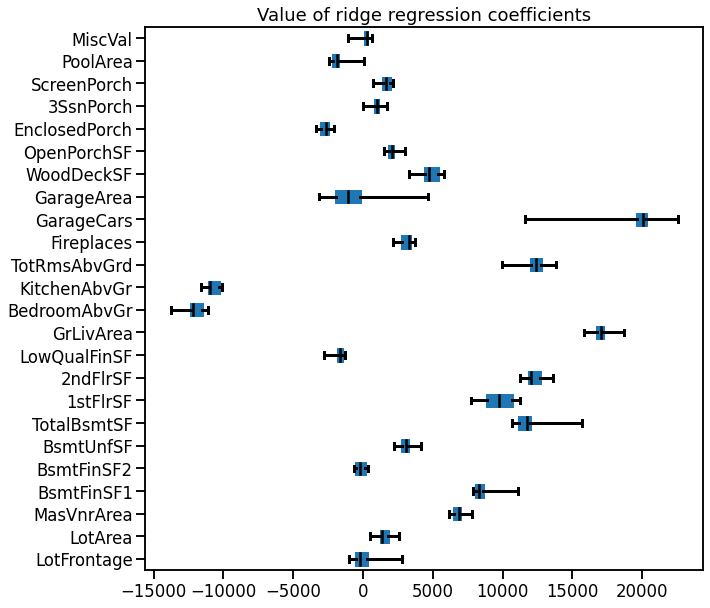

In [21]:
weights = pd.DataFrame([pipeline[-1].coef_ for pipeline in cv_results2['estimator']], columns=data_numerical.columns)

import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights.plot.box(color=color, vert=False, figsize=(10, 10))
_ = plt.title("Value of ridge regression coefficients")

<h1>Question 4</h1> (1 point possible)

Remove the feature "GarageArea" from the dataset and repeat the previous experiment.

What is the impact on the weights of removing "GarageArea" from the dataset?
a) None
b) Completely changes the order of the most important features
c) Decreases the standard deviation (across CV folds) of the "GarageCars" coefficient



In [22]:
data_numerical2 = data_numerical.drop(columns='GarageArea')

In [23]:
# model2 = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
cv_results3 = cross_validate(model2, data_numerical2, target, cv=10, return_estimator=True)

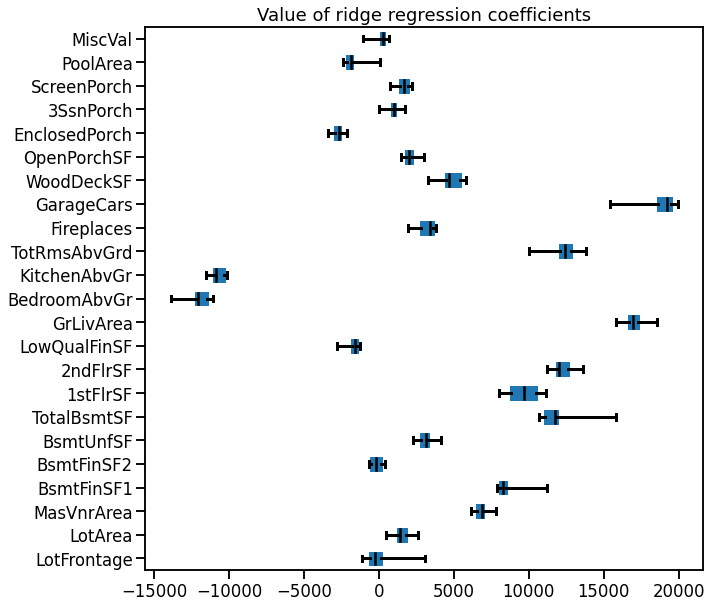

In [24]:
weights2 = pd.DataFrame([pipeline[-1].coef_ for pipeline in cv_results3['estimator']], columns=data_numerical2.columns)

import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights2.plot.box(color=color, vert=False, figsize=(10, 10))
_ = plt.title("Value of ridge regression coefficients")

# Question 5
(1/1 point)

What is the main reason for observing the previous impact on the most important weight(s)?
a) Both garage features are correlated and are carrying similar information a) Both garage features are correlated and are carrying similar information - correct
b) Removing the "GarageArea" feature reduces the noise in the dataset
c) Just some random effects 

<h1>Question 6</h1> (1 point possible)

Now, we will search for the regularization strength that maximizes the generalization performance of our predictive model. Fit a sklearn.linear_model.RidgeCV instead of a Ridge regressor on the numerical data without the "GarageArea" column. Pass alphas=np.logspace(-3, 3, num=101) to explore the effect of changing the regularization strength.

What is the effect of tuning alpha on the variability of the weights of the feature "GarageCars"? Remember that the variability can be assessed by computing the standard deviation.
a) The variability does not change after tuning alpha
b) The variability decreased after tuning alpha
c) The variability increased after tuning alpha 

In [26]:
from sklearn.linear_model import RidgeCV
import numpy as np

alphas=np.logspace(-3, 3, num=101)

model3 = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, store_cv_values=True))
cv_results4 = cross_validate(model3, data_numerical2, target, cv=10, return_estimator=True)

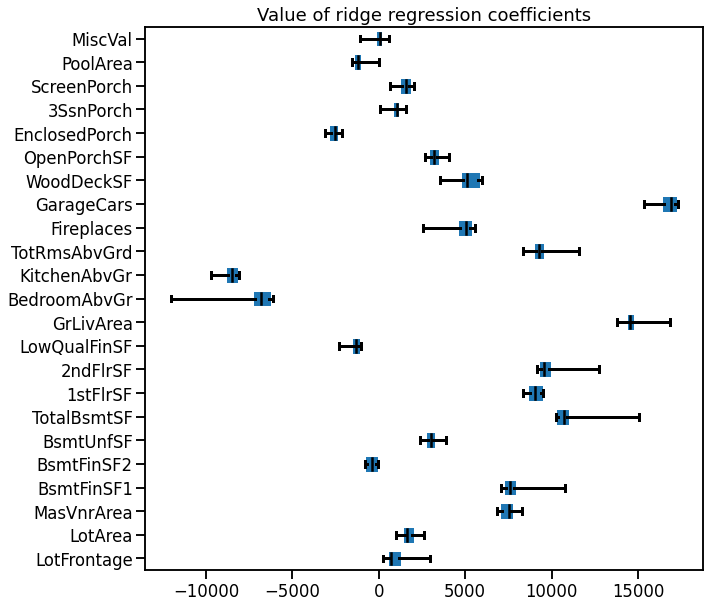

In [47]:
weights3 = pd.DataFrame([pipeline[-1].coef_ for pipeline in cv_results4['estimator']], columns=data_numerical2.columns)

import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights3.plot.box(color=color, vert=False, figsize=(10, 10))
_ = plt.title("Value of ridge regression coefficients")

In [46]:
[pipeline[-1].coef_ for pipeline in cv_results4['estimator']]

[array([  672.60327931,  1562.66090673,  8180.7283949 ,  7912.43860926,
         -448.32444005,  2928.68780166, 10940.76740013,  9325.49321675,
         9398.31573709, -1226.76801058, 14487.87886166, -6302.09203822,
        -8504.0403146 ,  9130.46261599,  5291.40944521, 16938.48235624,
         4882.37954184,  3375.1125716 , -2125.39721745,  1546.7743354 ,
         1512.60950057, -1294.74803288,   108.18104392]),
 array([  248.57723078,  1514.91320769,  7339.45357106,  7676.66828387,
         -280.44163787,  2963.1214754 , 10833.23114285,  9069.9941511 ,
         9461.1882595 , -2280.25773859, 14312.76404731, -6358.76437891,
        -8841.11644714,  9248.76551121,  5095.72644265, 16306.32573439,
         5776.52446479,  2959.56212268, -2836.39959021,   979.17933331,
          667.69785668, -1125.21226661,    54.41499804]),
 array([  684.66656335,   994.23568551,  7542.15500713,  7644.16835702,
         -819.97900193,  3145.99505761, 10819.38153225,  8904.0153792 ,
         9716.583516

<h1>Question 7</h1> (1 point possible)

Check the parameter alpha_ (the regularization strength) for the different ridge regressors obtained on each fold.

In which range does alpha_ fall into for most folds?
a) between 0.1 and 1
b) between 1 and 10
c) between 10 and 100
d) between 100 and 1000 

In [28]:
for pipeline in cv_results4['estimator']:
    print(pipeline[-1].alpha_)

331.13112148259074
331.13112148259074
288.40315031266056
331.13112148259074
331.13112148259074
331.13112148259074
288.40315031266056
331.13112148259074
63.0957344480193
331.13112148259074


Now, we will tackle a classification problem instead of a regression problem. Load the Adult Census dataset with the following snippet of code and we will work only with numerical features.

In [62]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target2 = adult_census["class"]
data2 = adult_census.select_dtypes(["integer", "floating"])
data2 = data2.drop(columns=["education-num"])

<h1>Question 8</h1> (1 point possible)

How many numerical features are present in the dataset contained in the variable data?
a) 3
b) 4
c) 5 

In [63]:
data2

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


In [64]:
target2

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

<h1>Question 9</h1> (1 point possible)

Compare the generalization performance using the accuracy of the two following predictive models using a 10-fold cross-validation:

    a linear model composed of a StandardScaler and a LogisticRegression
    a DummyClassifier predicting the most frequent class

By comparing the cross-validation test scores of both models fold-to-fold, count the number of times the linear model has a better test score than the dummy classifier. Select the range which this number belongs to:
a) [0, 3]: the linear model is substantially worse than the dummy classifier
b) [4, 6]: both models are almost equivalent
c) [7, 10]: the linear model is substantially better than the dummy classifier 

In [65]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

model4 = make_pipeline(StandardScaler(), LogisticRegression())
cv_results5 = cross_validate(model4, data2, target2, cv=10, return_estimator=True)

# dumdum2 = DummyClassifier(strategy="constant", constant=" >50K")


dumdum2 = DummyClassifier(strategy="most_frequent")
cv_results6 = cross_validate(dumdum2, data2, target2, cv=10)
cv_results7 = cross_validate(dumdum2, data2, target2, cv=10, scoring="balanced_accuracy")
# dumdum.fit(data_train, target_train)
# dumdum.score(data_test, target_test)

In [66]:
cv_results5['test_score'] > cv_results6['test_score']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [67]:
cv_results5['test_score'] > cv_results7['test_score']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

<h1>Question 10</h1> (1 point possible)

What is the most important feature seen by the logistic regression?
a) "age"
b) "capital-gain"
c) "capital-loss"
d) "hours-per-week" 

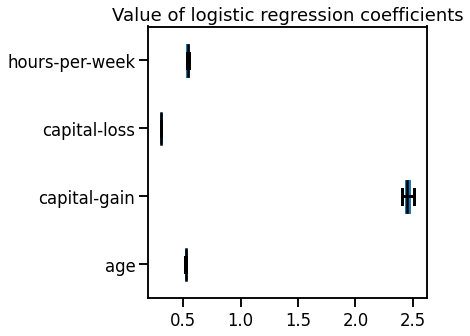

In [68]:
weights5 = pd.DataFrame([pipeline[-1].coef_[0] for pipeline in cv_results5['estimator']], columns=data2.columns)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights5.plot.box(color=color, vert=False, figsize=(5, 5))
_ = plt.title("Value of logistic regression coefficients")

In [48]:
[pipeline[-1].coef_[0] for pipeline in cv_results5['estimator']]

[array([0.52204276, 2.4667774 , 0.30602977, 0.53963505]),
 array([0.52606692, 2.40653282, 0.30817766, 0.54182433]),
 array([0.52425661, 2.45592287, 0.30812359, 0.54384342]),
 array([0.52037496, 2.45048201, 0.30916996, 0.53459728]),
 array([0.51925928, 2.51201042, 0.30424291, 0.54671495]),
 array([0.52173216, 2.4416315 , 0.30401707, 0.54128619]),
 array([0.52023528, 2.47372277, 0.30689298, 0.53637405]),
 array([0.52395804, 2.44532129, 0.30832579, 0.53825271]),
 array([0.51645436, 2.40508701, 0.30839363, 0.53512121]),
 array([0.51673694, 2.45048914, 0.30139428, 0.53553169])]

Now, we will work with both numerical and categorical features. You can load Adult Census with the following snippet:

In [52]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target3 = adult_census["class"]
data3 = adult_census.drop(columns=["class", "education-num"])

In [53]:
data3

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


<h1>Question 11</h1> (1 point possible)

Create a predictive model where the categorical data must be one-hot encoded, the numerical data must be scaled, and the predictor is a logistic regression classifier.

Use the same 10-fold cross-validation strategy as above to evaluate this complex pipeline.

Look at the cross-validation test scores for both models and count the number of times the model using both numerical and categorical features has a better test score than the model using only numerical features.
Select the range which this number belongs to:
a) [0, 3]: the model using both numerical and categorical features is substantially worse than the model using only numerical features
b) [4, 6]: both models are almost equivalent
c) [7, 10]: the model using both numerical and categorical features is substantially better than the model using only numerical features 

In [54]:
from sklearn.compose import make_column_selector

categorical_columns = make_column_selector(dtype_include=object)(data3)
# data3_categorical = data3[categorical_columns]
numerical_columns = make_column_selector(dtype_exclude=object)(data3)
# data3_numerical = data3[numerical_columns]

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([("OneHot", categorical_preprocessor, categorical_columns), ("StdScaler", numerical_preprocessor, numerical_columns)])

model5 = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
cv_results8 = cross_validate(model5, data3, target3, cv=10, return_estimator=True)

In [60]:
cv_results8['test_score'] > cv_results5['test_score']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

For the following questions, you can use the following snippet to get the feature names after the preprocessing performed.

In [70]:
preprocessor.fit(data3)
feature_names = (preprocessor.named_transformers_["OneHot"].get_feature_names_out(categorical_columns)).tolist()
feature_names += numerical_columns
feature_names

['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Fa

There is as many feature names as coefficients in the last step of your predictive pipeline.
<h1>Question 12</h1> (1 point possible)

Which of the following pair of features is most impacting the predictions of the logistic regression classifier based on the relative magnitude of its coefficients?
a) "hours-per-week" and "native-country_Columbia"
b) "workclass_?" and "native_country_?"
c) "capital-gain" and "education_Doctorate" 

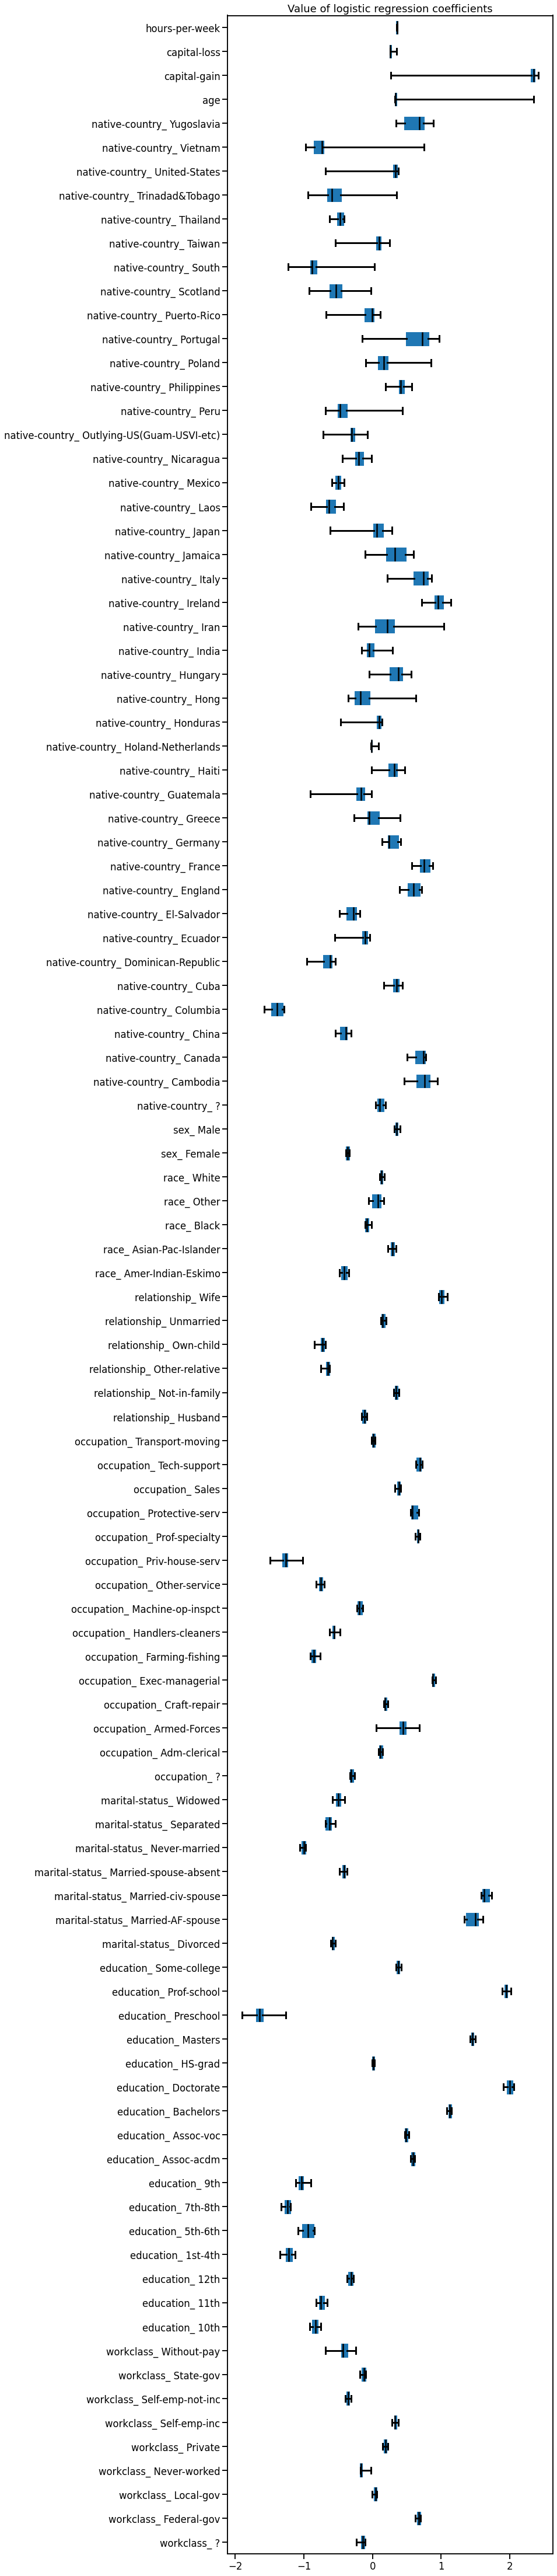

In [75]:
weights8 = pd.DataFrame([pipeline[-1].coef_[0] for pipeline in cv_results8['estimator']], columns=feature_names)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights8.plot.box(color=color, vert=False, figsize=(10, 80))
_ = plt.title("Value of logistic regression coefficients")

# Question 13
(1/1 point)

What is the effect of decreasing the C parameter on the coefficients?
a) shrinking the magnitude of the weights towards zeros
b) increasing the magnitude of the weights
c) reducing the weights' variance
d) increasing the weights' variance
e) it has no influence on the weights' variance 